# MODELLING - EXTRA VARIABLES

Welcome to the Modelling Notebook of the Kiva Capstone Project! This notebook's purpose is to see if people take into account default and delinquency rates when choosing whether to fund a loan on Kiva.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score

In [2]:
loans = pd.read_csv('/Users/nicolas/Downloads/loans2_data_modelling.csv')

In [3]:
loans.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
y = loans['status']
X = loans.copy().drop('status',axis=1)

In [5]:
y.value_counts()

0    1382664
1      75913
Name: status, dtype: int64

## BASIC MODELS

Let's first start with some basic models to have a baseline score we need to beat.

In [6]:
x_train,x_test, y_train, y_test = train_test_split(
    X,y, stratify=y, test_size=0.3, random_state=1)

In [7]:
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))
x_predrf = rf.predict(x_test)
print(precision_score(y_test,x_predrf))

0.9522343649302747
0.8524651863003387


In [8]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train, y_train)
print(logreg.score(x_test, y_test))
x_predlr = logreg.predict(x_test)
print(precision_score(y_test,x_predlr))

0.9474351766786875
0.12786885245901639


## INBALANCE CLASSIFICATION METHODS

As you can see there is a severe imbalance in class labels, as the occurance of class 1 happens only 0.045% of the time. To cope with this challenge, I tried two methods : Cost Sensitive methods and Sampling Methods.

In [9]:
loans.status.value_counts(normalize=True)

0    0.947954
1    0.052046
Name: status, dtype: float64

## COST SENSITIVE METHOD

Cost Sensitive methods consist in tuning the 'class_weight' parameter which gives slightly more importance to the minority class when modelling. Grisearch instantiates many models and brings back the one with the highest precision. Tried it both with random forests and logistic regression. 

### RANDOM FOREST

In [10]:
params = {'class_weight': [{0:0.01,1:0.02},{0:0.01,1:0.03},{0:0.01,1:0.4}]}
gs = GridSearchCV(estimator= RandomForestClassifier(n_estimators=100),
                  param_grid=params,
                  cv=5,
                  scoring='precision',
                  verbose=1)
# fit the gridsearch object on your training data
gs.fit(x_train, y_train)

# extract the grid search results
# print out the best parameters
print('Best Parameters:')
print(gs.best_params_)
# print out the best mean cross-validated score
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(x_train, y_train))
# score your model on your testing data
print('Best estimator score on the test set:')
print(gs.score(x_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 102.4min finished


Best Parameters:
{'class_weight': {0: 0.01, 1: 0.02}}
Best estimator mean cross validated training score:
0.8231314090925176
Best estimator score on the full training set:
1.0
Best estimator score on the test set:
0.842530755711775


In [11]:
params = {'class_weight': [{0:0.01,1:0.03},{0:0.01,1:0.4},{0:0.01,1:0.05}]}
gs3 = GridSearchCV(estimator= RandomForestClassifier(n_estimators=100),
                  param_grid=params,
                  cv=5,
                  scoring='precision',
                  verbose=1)
# fit the gridsearch object on your training data
gs3.fit(x_train, y_train)

# extract the grid search results
# print out the best parameters
print('Best Parameters:')
print(gs3.best_params_)
# print out the best mean cross-validated score
print('Best estimator mean cross validated training score:')
print(gs3.best_score_)
print('Best estimator score on the full training set:')
print(gs3.score(x_train, y_train))
# score your model on your testing data
print('Best estimator score on the test set:')
print(gs3.score(x_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 101.6min finished


Best Parameters:
{'class_weight': {0: 0.01, 1: 0.03}}
Best estimator mean cross validated training score:
0.8216726335656789
Best estimator score on the full training set:
1.0
Best estimator score on the test set:
0.8266759291420632


In [12]:
params = {'class_weight': [{0:0.01,1:0.01},{0:0.01,1:0.02},{0:0.01,1:0.03}]}
gs2 = GridSearchCV(estimator= LogisticRegression(max_iter = 10000),
                  param_grid=params,
                  cv=5,
                  scoring='precision',
                  verbose=1)
# fit the gridsearch object on your training data
gs2.fit(x_train, y_train)

# extract the grid search results
# print out the best parameters
print('Best Parameters:')
print(gs2.best_params_)
# print out the best mean cross-validated score
print('Best estimator mean cross validated training score:')
print(gs2.best_score_)
print('Best estimator score on the full training set:')
print(gs2.score(x_train, y_train))
# score your model on your testing data
print('Best estimator score on the test set:')
print(gs2.score(x_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 11.7min finished


Best Parameters:
{'class_weight': {0: 0.01, 1: 0.03}}
Best estimator mean cross validated training score:
0.11098732446276507
Best estimator score on the full training set:
0.10834132310642378
Best estimator score on the test set:
0.11103557670518921


In [13]:
csrf = gs3.best_estimator_

In [14]:
x_pred_csrf = csrf.predict(x_test)
print(accuracy_score(y_test,x_pred_csrf))

0.9522526475521854


## SAMPLING METHODS

The next method we can try is using Random Sampling to sample the training set in order to train on better proportions of class label percentages.

In [15]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
x_train,x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=1)
x_train,y_train = over.fit_resample(x_train,y_train)
x_train, y_train = under.fit_resample(x_train,y_train)

In [16]:
srf = RandomForestClassifier(n_estimators = 300)
srf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [17]:
srf.score(x_test,y_test)

0.9573146484937405

In [18]:
x_pred_srf = srf.predict(x_test)
print(precision_score(y_test,x_pred_srf))

0.7406015037593985


In [19]:
slr = LogisticRegression(max_iter=10000)
slr.fit(x_train, y_train)

print(slr.score(x_test, y_test))

x_pred_slr = slr.predict(x_test)
print(precision_score(y_test,x_pred_slr))

0.8904276762330485
0.12490314120522143


In [20]:
boostedrf = AdaBoostClassifier(base_estimator=rf,
                           random_state=1)
boostedrf.fit(x_train, y_train)

print(boostedrf.score(x_test, y_test))

x_pred_brf = boostedrf.predict(x_test)
print(precision_score(y_test,x_pred_brf))

0.9573557843930398
0.742170944195903


## CONFUSION MATRIX

Let's print out the confusion matrices of our 2 best models, the basic random forest and the cost-sensitive random forest. 

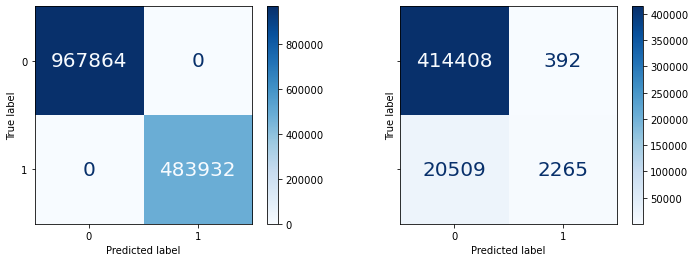

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(rf, x_train, y_train, cmap='Blues',ax=ax[0])
plot_confusion_matrix(rf, x_test, y_test, cmap='Blues', ax=ax[1])

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)

plt.show()

392 / (392+2265) = 0.1475. 14.75 % of False Positives.

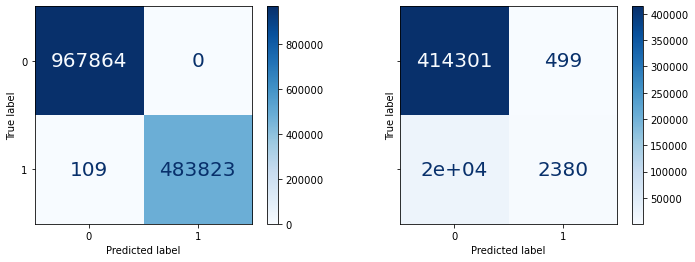

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(csrf, x_train, y_train, cmap='Blues',ax=ax[0])
plot_confusion_matrix(csrf, x_test, y_test, cmap='Blues', ax=ax[1])

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)

plt.show()

With our best model, 14.5% of loans promoted would actually be False Positives, or loans which would have been funded either way. 

## INFERENCE

These are the coeffients and feature importances of the basic logistic regression and random forests, which are also our best models.

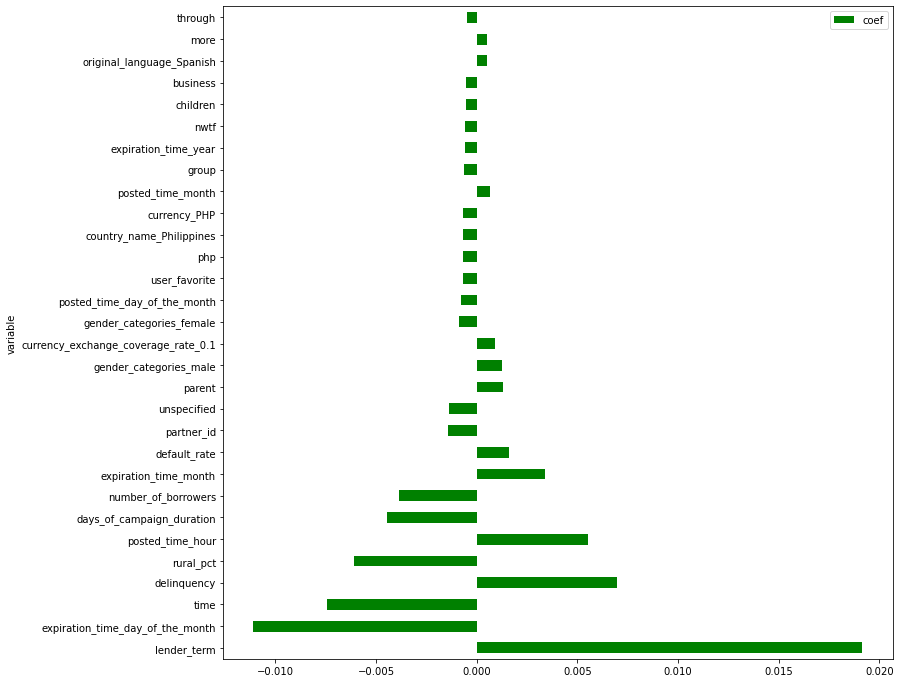

In [24]:
coefs_logreg = pd.DataFrame({
    'coef': logreg.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(logreg.coef_[0])
})
coefs_logreg.sort_values('abscoef', ascending=False, inplace=True)
coefs_logreg.head(30).plot(kind='barh', x='variable', y='coef',
                      color='g', figsize=(12, 12), label='coef')
plt.show()

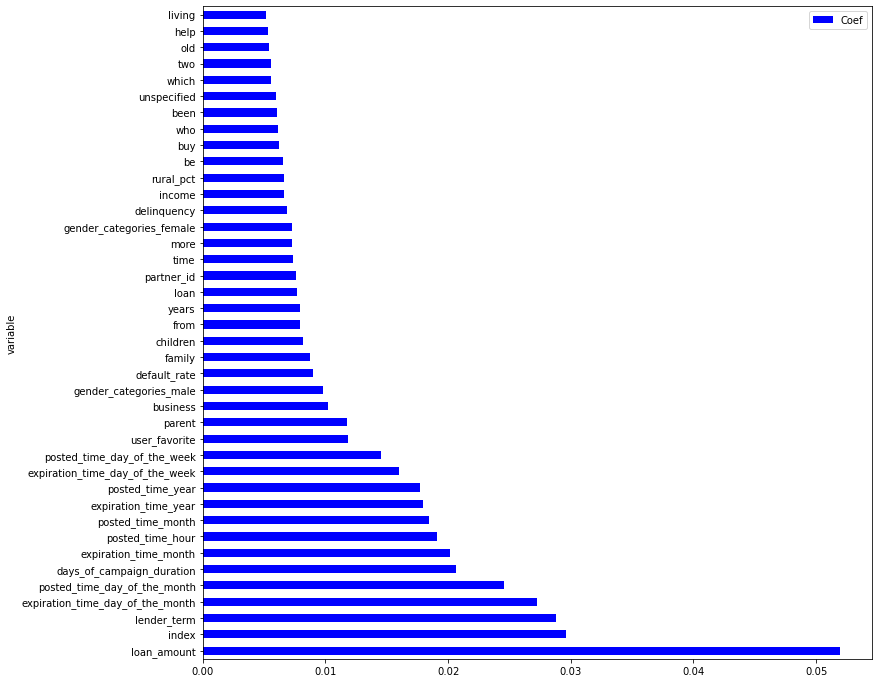

In [25]:
coefs_rf = pd.DataFrame({
    'feature_importances': rf.feature_importances_,
    'variable': X.columns})
coefs_rf.sort_values('feature_importances', ascending=False, inplace=True)
coefs_rf.head(40).plot(kind='barh', x='variable', y='feature_importances',
                      color='b', figsize=(12, 12), label='Coef')
plt.show()

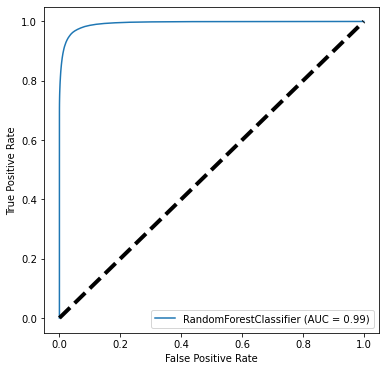

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(csrf, X, y, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.show()

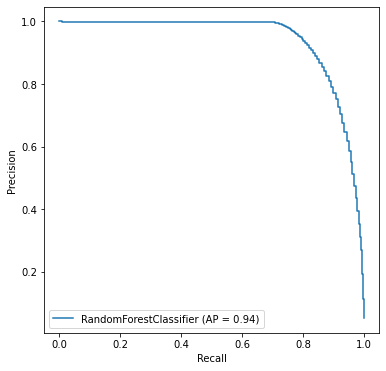

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(csrf, X, y, ax=ax)
plt.show()